<a href="https://colab.research.google.com/github/MdShahadatHossainbd/Plant-Disease-Detection/blob/main/Tomato_Leaf_Disease_Prediction_ResNet50_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 55kB/s 


In [2]:
!nvidia-smi

Sat Oct 10 06:44:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [8]:


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Programs/Datasets/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/My Drive/Programs/Datasets/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'



In [9]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [20]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/*')

In [21]:
folders

['/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/Programs/Datasets/New Plant Diseases Da

In [22]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [24]:
# view the structure of the model
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [30]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [31]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [33]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2047 images belonging to 10 classes.


In [34]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
574/574 [==============================] - 11181s 19s/step - loss: 2.4550 - accuracy: 0.3290 - val_loss: 2.1133 - val_accuracy: 0.3434
Epoch 2/50
574/574 [==============================] - 233s 405ms/step - loss: 1.8400 - accuracy: 0.4572 - val_loss: 2.2052 - val_accuracy: 0.4998
Epoch 3/50
574/574 [==============================] - 232s 405ms/step - loss: 1.7650 - accuracy: 0.4941 - val_loss: 2.8446 - val_accuracy: 0.2980
Epoch 4/50
574/574 [==============================] - 234s 407ms/step - loss: 1.7036 - accuracy: 0.5177 - val_loss: 1.4584 - val_accuracy: 0.6263
Epoch 5/50
574/574 [==============================] - 235s 409ms/step - loss: 1.5972 - accuracy: 0.5443 - val_loss: 1.4338 - val_accuracy: 0.6170
Epoch 6/50
574/574 [==============================] - 234s 407ms/step - loss: 1.5820 - accuracy: 0.5503 - val_loss: 1.4024 - val_accuracy: 0.6136
Epoch 7/50
574/574 [==============================] - 233s 406ms/step - loss: 1.5742 - accuracy: 0.5648 - val_loss: 3.6379 -

In [36]:
import matplotlib.pyplot as plt

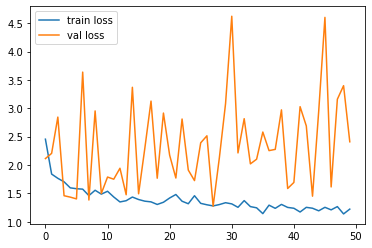

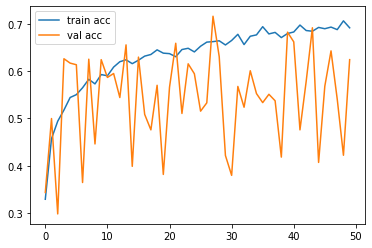

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [40]:
y_pred = model.predict(test_set)
y_pred

array([[1.39666181e-08, 4.28046005e-05, 1.63046867e-02, ...,
        1.15907968e-08, 2.83319969e-03, 9.59595223e-14],
       [2.22429112e-01, 3.41946696e-04, 5.84961712e-01, ...,
        4.27117804e-03, 7.49342277e-08, 1.96748024e-05],
       [8.62255096e-01, 4.24736209e-06, 3.00069834e-04, ...,
        1.40589009e-07, 1.82495583e-07, 3.46416384e-02],
       ...,
       [6.57563781e-10, 4.70153100e-06, 1.88212231e-04, ...,
        1.07941224e-13, 2.52779922e-03, 2.79875068e-10],
       [6.79143341e-17, 6.51460941e-10, 2.37667344e-08, ...,
        2.63936051e-09, 3.07651391e-07, 1.44371262e-08],
       [1.33990106e-04, 3.99280943e-05, 1.42981946e-01, ...,
        4.64340519e-06, 8.45391878e-06, 1.28362983e-04]], dtype=float32)

In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [43]:
y_pred

array([3, 2, 0, ..., 3, 5, 3])

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('model_resnet50.h5')

In [60]:
img_data

array([[[[-103.37822 , -116.218216, -123.09569 ],
         [-103.37038 , -116.21037 , -123.087845],
         [-103.36253 , -116.20253 , -123.08    ],
         ...,
         [-103.33116 , -116.179   , -123.05647 ],
         [-103.339005, -116.186844, -123.064316],
         [-103.342926, -116.190765, -123.06824 ]],

        [[-103.366455, -116.20645 , -123.08392 ],
         [-103.366455, -116.20645 , -123.08392 ],
         [-103.35861 , -116.19861 , -123.07608 ],
         ...,
         [-103.33508 , -116.18292 , -123.060394],
         [-103.33508 , -116.18292 , -123.060394],
         [-103.33508 , -116.18292 , -123.060394]],

        [[-103.35861 , -116.19861 , -123.07608 ],
         [-103.35861 , -116.19861 , -123.07608 ],
         [-103.35861 , -116.19861 , -123.07608 ],
         ...,
         [-103.339005, -116.186844, -123.064316],
         [-103.33508 , -116.18292 , -123.060394],
         [-103.33508 , -116.18292 , -123.060394]],

        ...,

        [[-103.50371 , -116.347626, -1

In [52]:
img=image.load_img('/content/drive/My Drive/Programs/Datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG',target_size=(224,224))

In [53]:
x=image.img_to_array(img)
x

array([[[149., 143., 143.],
        [151., 145., 145.],
        [153., 147., 147.],
        ...,
        [159., 153., 155.],
        [157., 151., 153.],
        [156., 150., 152.]],

       [[152., 146., 146.],
        [152., 146., 146.],
        [154., 148., 148.],
        ...,
        [158., 152., 154.],
        [158., 152., 154.],
        [158., 152., 154.]],

       [[154., 148., 148.],
        [154., 148., 148.],
        [154., 148., 148.],
        ...,
        [157., 151., 153.],
        [158., 152., 154.],
        [158., 152., 154.]],

       ...,

       [[120., 110., 111.],
        [117., 107., 108.],
        [116., 106., 107.],
        ...,
        [115., 109., 111.],
        [113., 107., 109.],
        [120., 114., 116.]],

       [[121., 111., 112.],
        [118., 108., 109.],
        [117., 107., 108.],
        ...,
        [119., 113., 115.],
        [119., 113., 115.],
        [119., 113., 115.]],

       [[121., 111., 112.],
        [117., 107., 108.],
        [117., 1

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=x/255

In [56]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [57]:
model.predict(img_data)

array([[0.0000000e+00, 1.3541300e-30, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.3433954e-22, 0.0000000e+00,
        8.8391662e-01, 1.1608337e-01]], dtype=float32)

In [58]:
a=np.argmax(model.predict(img_data), axis=1)

In [59]:
a==1

array([False])